# Document-Oriented Database

Hi everyone, <br />

This session introduces document-oriented databases. 

It will walk you though the following sections:

1. What is a document-oriented database
2. MongoDB
3. Boston Airbnb data
4. Comparaison between relation database and document-oriented database

## 1. What is a document-oriented database

** Storing documents rather than tables **

Relational databases store data in several tables. Consequently, data about a given object can be spread across several tables. <br />

The main idea of document-oriented databases is to store all data about a given object in the same instance of the database. <br />

For example, in a document-oriented database, data about an accommodation and its reviews would be stored together in the same instance of the database. The stored document would contain all information related to this accommodation.

** Yeaaah ... I think I know what's table. But what is a document ?**

Not all document-oriented database use the same type of document structure. <br/>
Definition of a document differs in different implementations of document-oriented database. <br/>

Documents are objects that can encapsulate and encode data. <br>JSON or XML documents are examples of document structures that are used in document-oriented database.

** What is a JSON ?**

A jSON is a document storing information into a structure that is similar to the dictionary we have seen in Introduction to Python.

** What is an XML ?**

An XML is a document storing information into an XML structure. XML is used by many programmer in web development.

** Unstructured databases **

Documents registered in document-oriented database are not required to adhere to a standart schema. <br/>
Further, it is not required that all documents share the same sections. <br/>
This is why document-oriented databases are also called "unstructured database".

**Database, collection, document and unique key**

A database is composed of one or several collections. <br/>

A collection is composed of one or several documents. <br/>

Each document has a unique key that uniquely identifies it in the collection. <br/>

## 2. MongoDB

**What is MongoDB ?**

MongoDB is a document-oriented database that uses JSON-like documents. <br/>

MongoDB is also a free an open-source program

**Selecting documents in MongoDB**

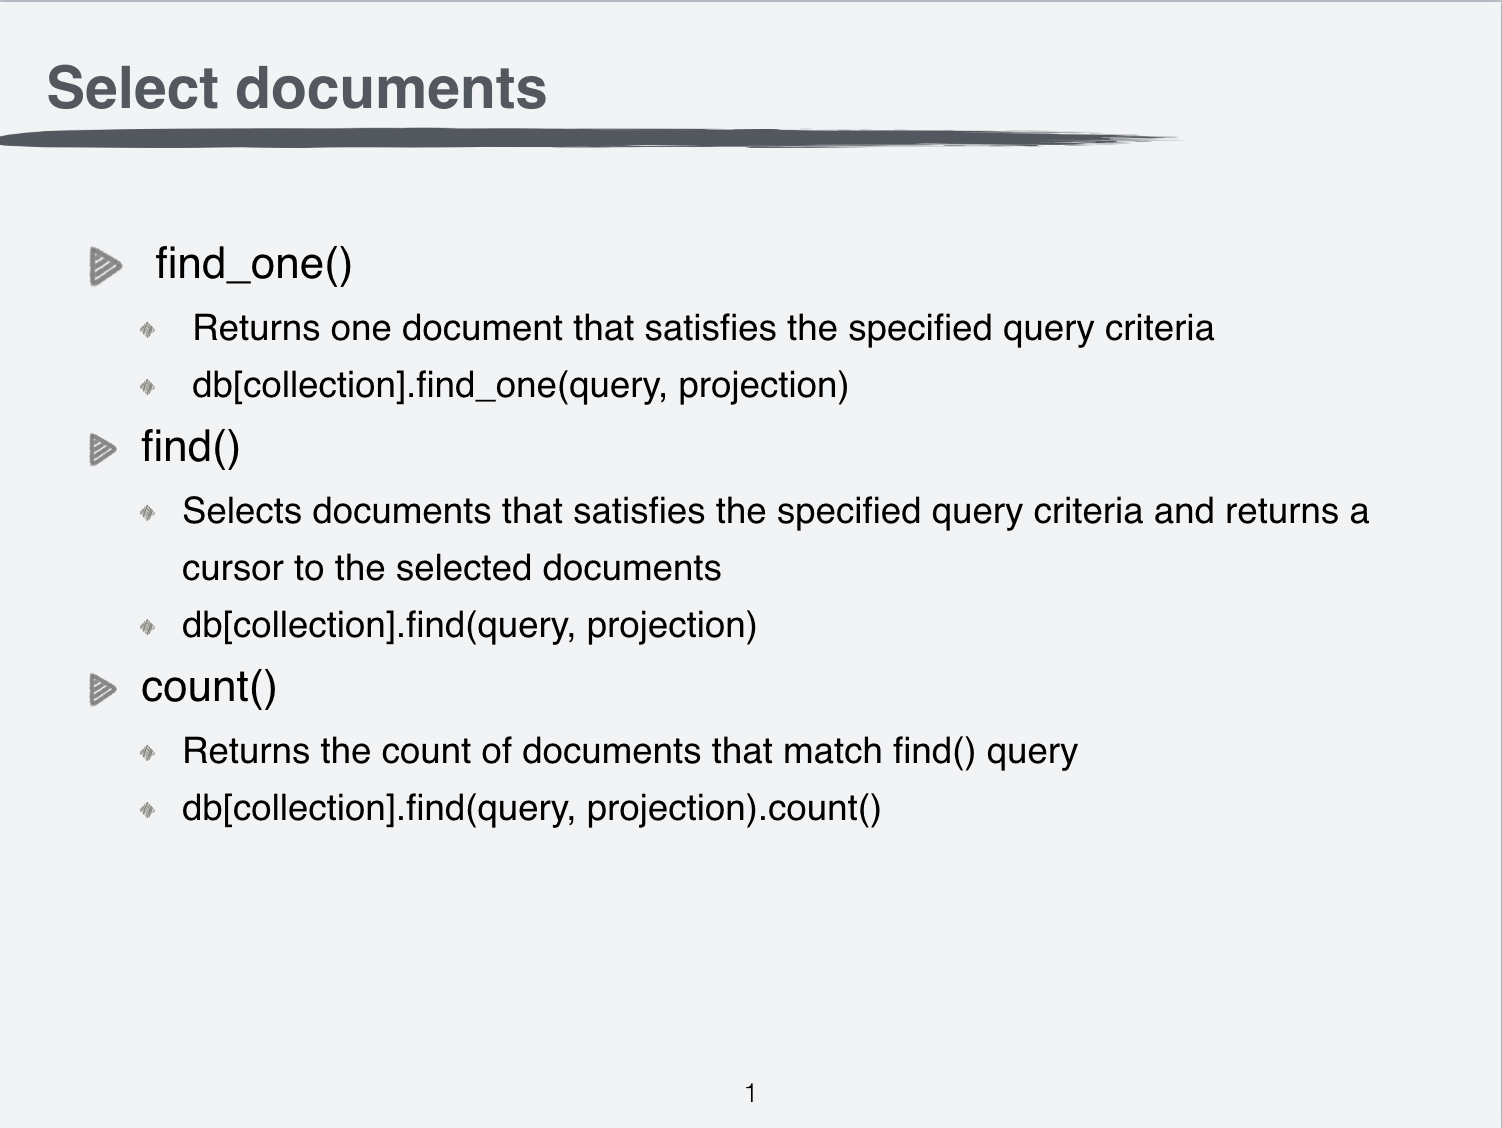

In [1]:
from IPython.display import Image
Image(filename='MongoDB/1.png',width=600, height=600)

**Queries in MongoDB**

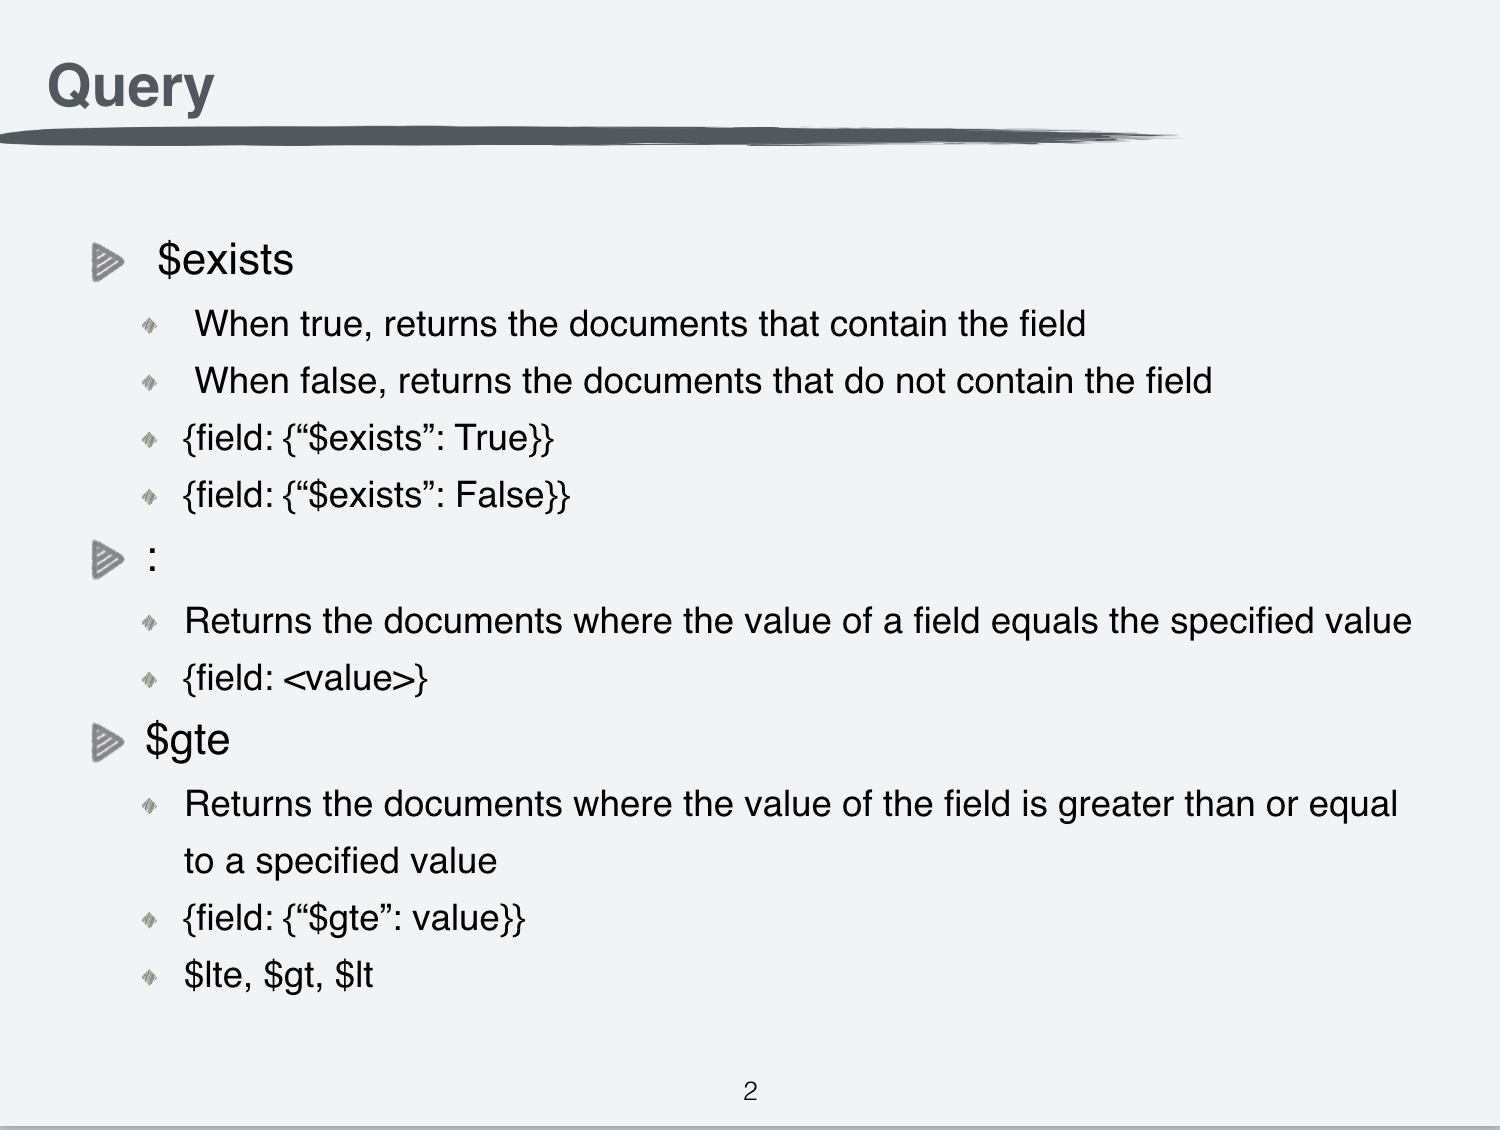

In [3]:
from IPython.display import Image
Image(filename='MongoDB/2.png',width=600, height=600)

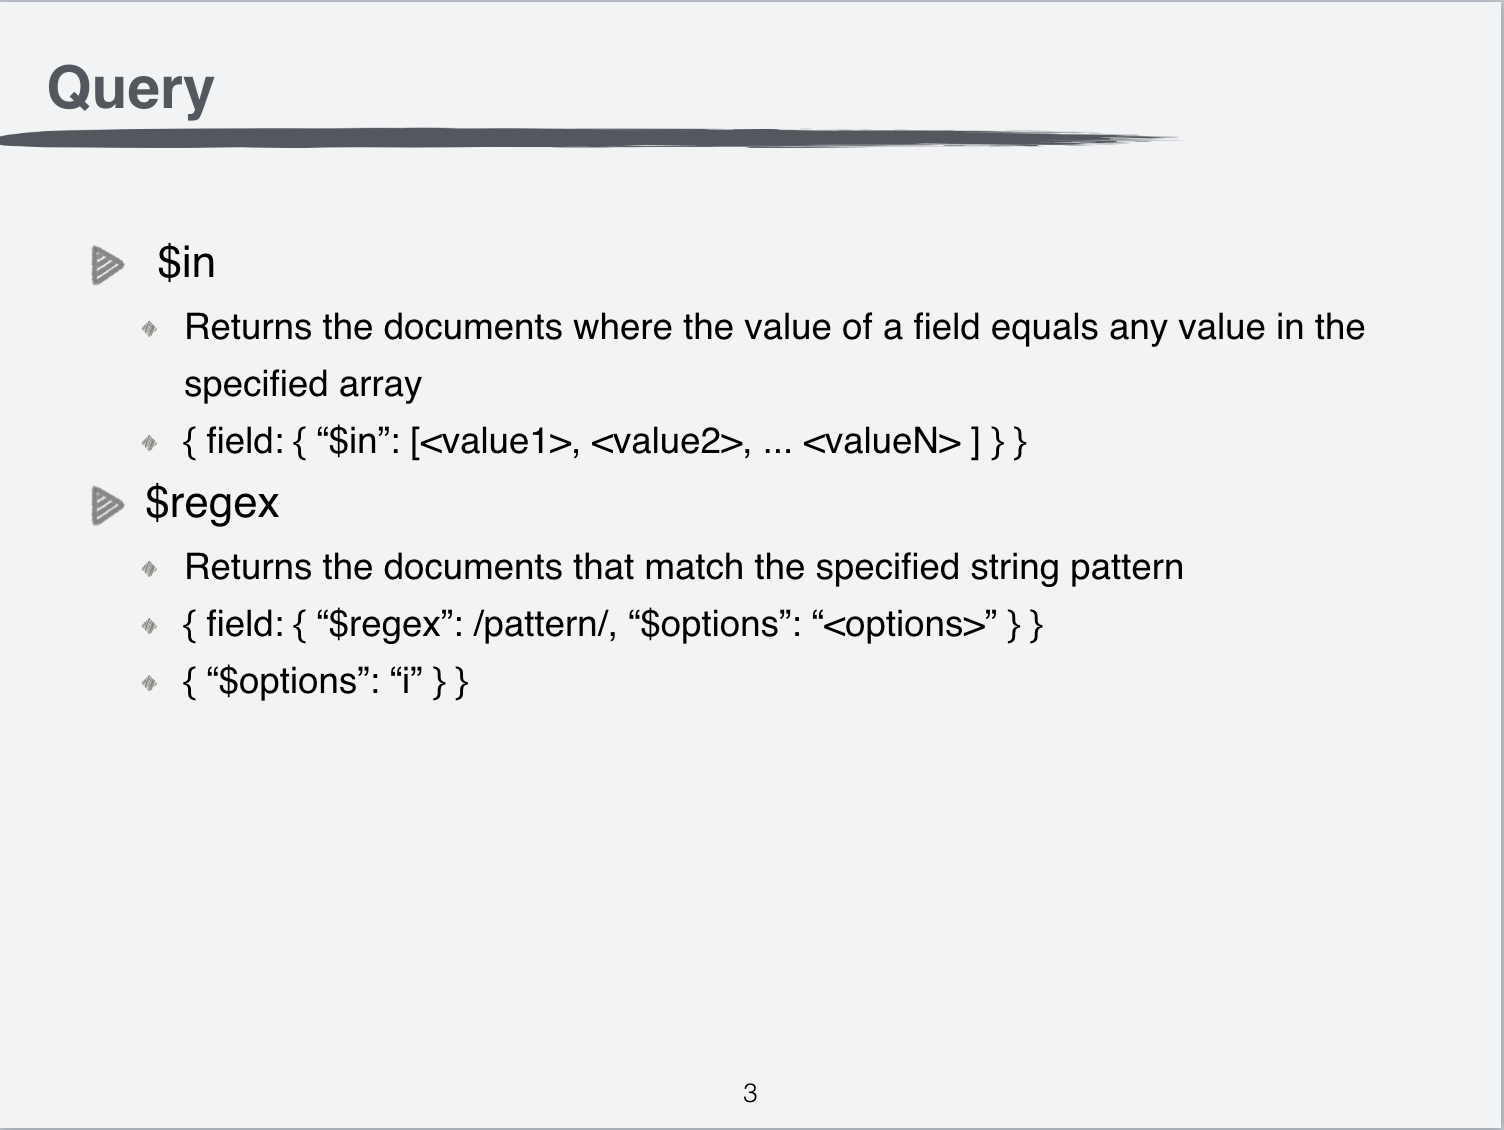

In [24]:
from IPython.display import Image
Image(filename='MongoDB/3.png',width=600, height=600)

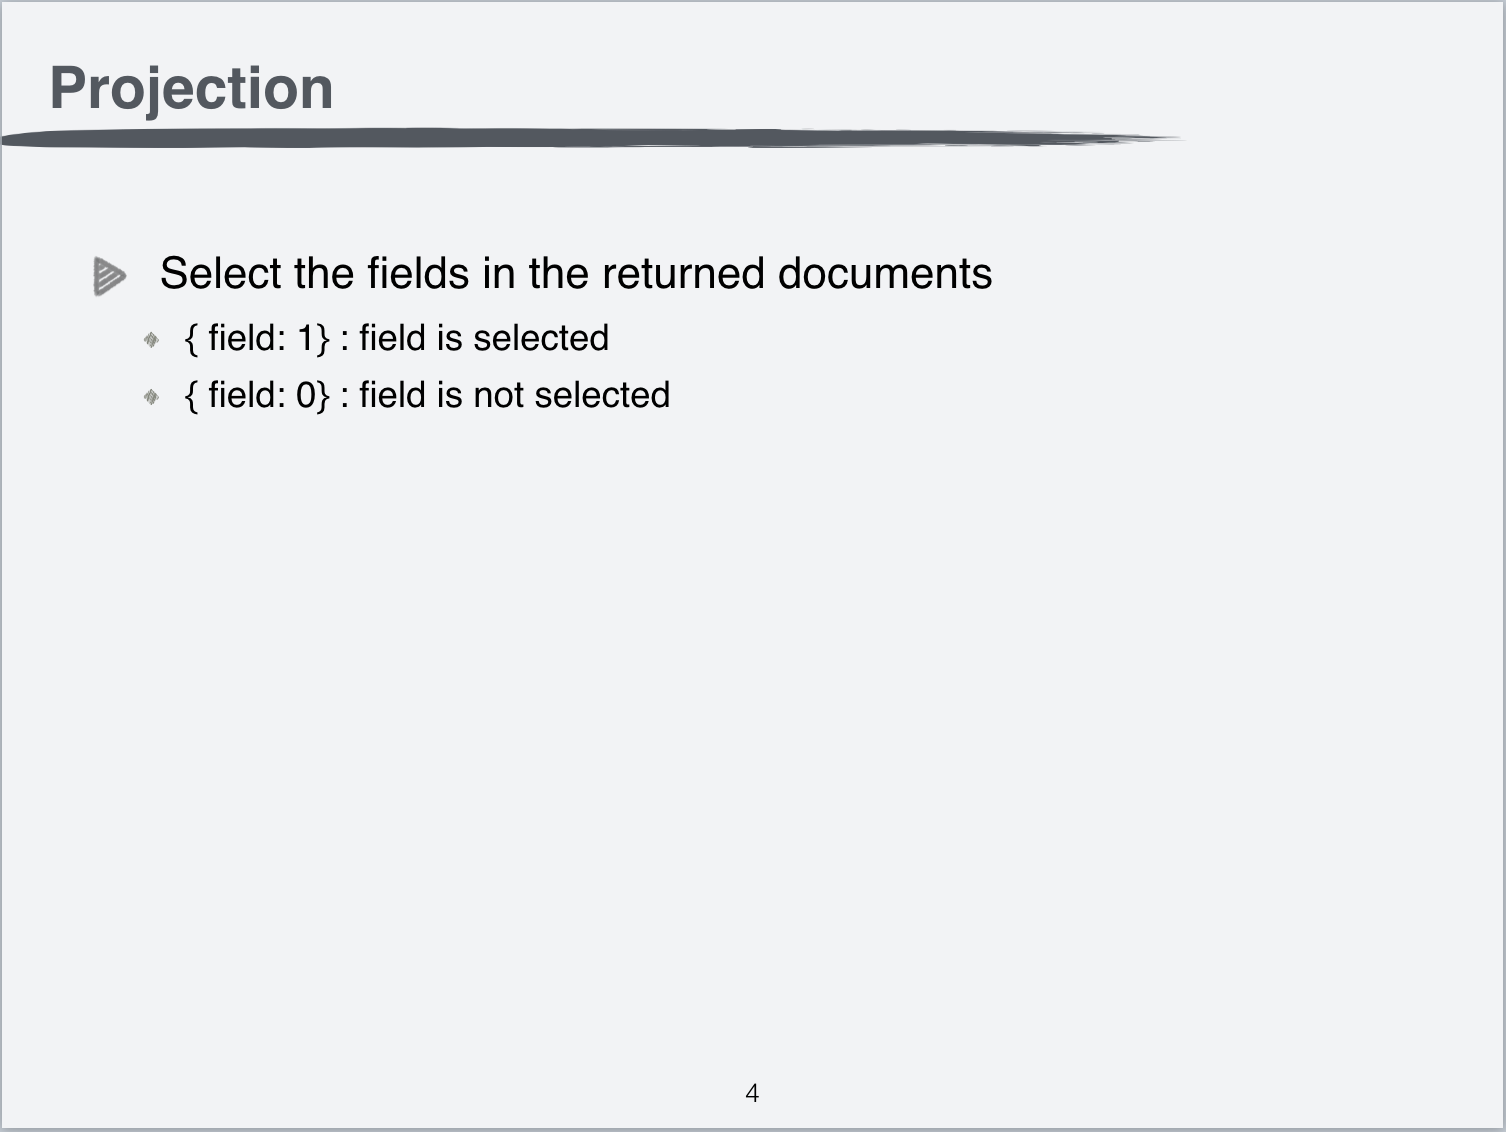

In [25]:
from IPython.display import Image
Image(filename='MongoDB/4.png',width=600, height=600)

**Aggregations in MongoDB**

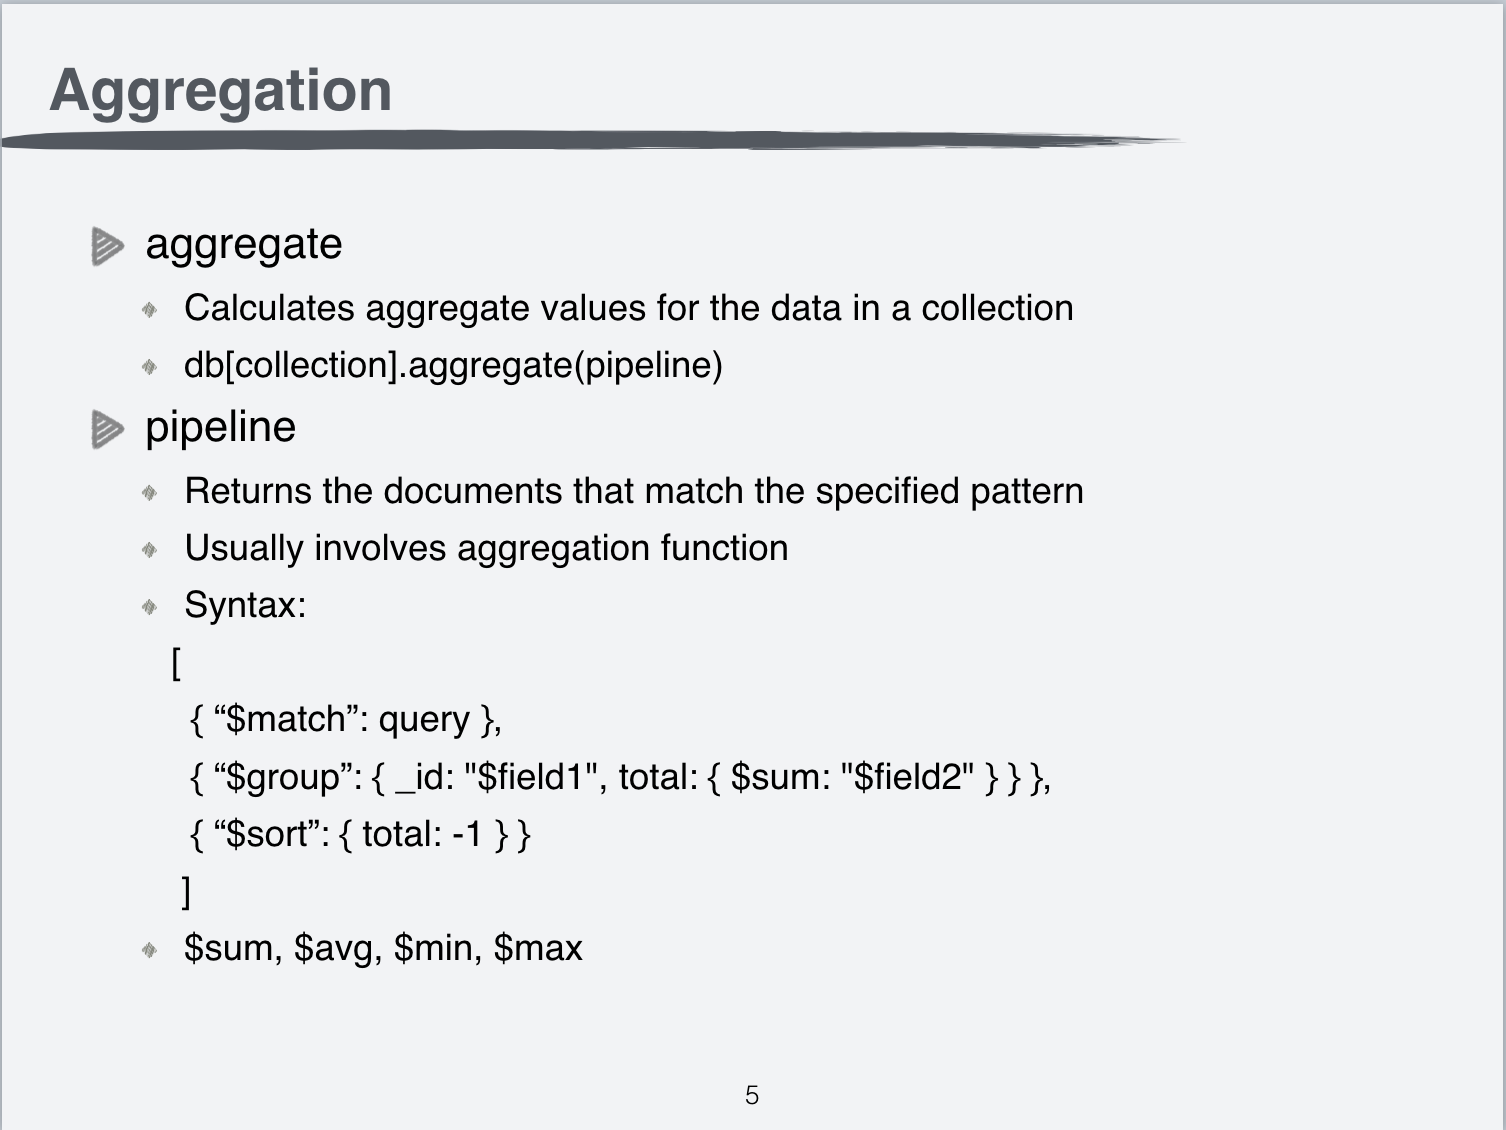

In [26]:
from IPython.display import Image
Image(filename='MongoDB/5.png',width=600, height=600)

## 3. Boston Airbnb data

Run the following lines to connect to "accommodation" collection in MongoDB

In [1]:
from pymongo import MongoClient, errors
client = MongoClient()
db = client['Solvay']
import pprint
pp = pprint.PrettyPrinter(depth=6)

**3.1 Can you select the first document in 'accommodations' collection ?** <br>
Print the type of the returned value and comment

In [19]:
document = db['accommodations'].find_one()
pp.pprint(document)

{u'_id': ObjectId('586d0fe901651c096fea367b'),
 u'bathrooms': 1,
 u'bed_type': u'Real Bed',
 u'beds': 2,
 u'city': u'Boston',
 u'cleaning_fee': 0,
 u'host_name': u'Crystal',
 u'id': 14690527,
 u'listing_url': u'https://www.airbnb.com/rooms/14690527',
 u'maximum_nights': 1125,
 u'minimum_nights': 1,
 u'name': u'1 Bedroom Home Suite Home',
 u'price': 150,
 u'reviews': [],
 u'street': u'Conway Street, Boston, MA 02131, United States',
 u'summary': u"My place is good for couples, solo adventurers, business travelers, and families (with kids).  A clean space you can relax in and entertain yourself with the trinkets we've collected and placed thoughtfully throughout our home. We are conveniently located on a street that ends into the Harvard Arboretum on one end and has the Roslindale Village Commuter Rail at the other with a short cut path into Roslindale Village for shops and dinning."}


** 3.2 Can you select the 3 first documents in 'accommodations' collection ?** <br>
Print the type of the returned values and comment

In [20]:
cursor = db['accommodations'].find().limit(3)
for elem in cursor:
    pp.pprint(elem)
    print("")

{u'_id': ObjectId('586d0fe901651c096fea367b'),
 u'bathrooms': 1,
 u'bed_type': u'Real Bed',
 u'beds': 2,
 u'city': u'Boston',
 u'cleaning_fee': 0,
 u'host_name': u'Crystal',
 u'id': 14690527,
 u'listing_url': u'https://www.airbnb.com/rooms/14690527',
 u'maximum_nights': 1125,
 u'minimum_nights': 1,
 u'name': u'1 Bedroom Home Suite Home',
 u'price': 150,
 u'reviews': [],
 u'street': u'Conway Street, Boston, MA 02131, United States',
 u'summary': u"My place is good for couples, solo adventurers, business travelers, and families (with kids).  A clean space you can relax in and entertain yourself with the trinkets we've collected and placed thoughtfully throughout our home. We are conveniently located on a street that ends into the Harvard Arboretum on one end and has the Roslindale Village Commuter Rail at the other with a short cut path into Roslindale Village for shops and dinning."}

{u'_id': ObjectId('586d0fe901651c096fea367c'),
 u'bathrooms': 1,
 u'bed_type': u'Real Bed',
 u'beds': 1

** 3.3 Can you select documents in 'accommodations' collection where host_name is 'Kevin' ? **

In [22]:
cursor = db['accommodations'].find({"host_name":"Kevin"},{"host_name":1})
for elem in cursor:
    pp.pprint(elem)

{u'_id': ObjectId('586d0fe901651c096fea367f'), u'host_name': u'Kevin'}
{u'_id': ObjectId('586d0fe901651c096fea37da'), u'host_name': u'Kevin'}


** 3.4 Can you select documents in 'accommodations' collection where price is below 50$ ? ** <br>
** Only select name, host_name and price values for each document **

In [23]:
cursor = db['accommodations'].find({"price":{"$lt":50}},{"host_name":1,"price":1})
for elem in cursor:
    pp.pprint(elem)

{u'_id': ObjectId('586d0fe901651c096fea367e'),
 u'host_name': u'Mattaya',
 u'price': 40}
{u'_id': ObjectId('586d0fe901651c096fea3685'),
 u'host_name': u'Jordan',
 u'price': 49}
{u'_id': ObjectId('586d0fe901651c096fea3689'),
 u'host_name': u'Mackenzie',
 u'price': 22}
{u'_id': ObjectId('586d0fe901651c096fea369f'),
 u'host_name': u'Kavya',
 u'price': 20}
{u'_id': ObjectId('586d0fe901651c096fea36a1'),
 u'host_name': u'Nina',
 u'price': 42}
{u'_id': ObjectId('586d0fe901651c096fea36c5'),
 u'host_name': u'Tayla',
 u'price': 22}
{u'_id': ObjectId('586d0fe901651c096fea36c6'),
 u'host_name': u'Tayla',
 u'price': 41}
{u'_id': ObjectId('586d0fe901651c096fea36cf'),
 u'host_name': u'Randy',
 u'price': 45}
{u'_id': ObjectId('586d0fe901651c096fea3718'),
 u'host_name': u'Hector',
 u'price': 45}
{u'_id': ObjectId('586d0fe901651c096fea377e'),
 u'host_name': u'Yuan',
 u'price': 45}
{u'_id': ObjectId('586d0fe901651c096fea3782'),
 u'host_name': u'Asem',
 u'price': 33}
{u'_id': ObjectId('586d0fe901651c096fe

** 3.5 Can you select documents in 'accommodations' collection where: price is between 50 and 75 dollars ?** <br>
** Only select name and price values for each document **

In [6]:
cursor = db['accommodations'].find({"price":{"$lt":70, "$gt":50}},{"host_name":1,"price":1})
for elem in cursor:
    pp.pprint(elem)

{u'_id': ObjectId('586d0fe901651c096fea367c'),
 u'host_name': u'Ashley',
 u'price': 63}
{u'_id': ObjectId('586d0fe901651c096fea367d'),
 u'host_name': u'Vera',
 u'price': 69}
{u'_id': ObjectId('586d0fe901651c096fea3683'),
 u'host_name': u'Sandy',
 u'price': 65}
{u'_id': ObjectId('586d0fe901651c096fea3684'),
 u'host_name': u'Vera',
 u'price': 59}
{u'_id': ObjectId('586d0fe901651c096fea3691'),
 u'host_name': u'Vinayak',
 u'price': 65}
{u'_id': ObjectId('586d0fe901651c096fea36c0'),
 u'host_name': u'Nirmal',
 u'price': 60}
{u'_id': ObjectId('586d0fe901651c096fea36d3'),
 u'host_name': u'Yisha',
 u'price': 52}
{u'_id': ObjectId('586d0fe901651c096fea36d5'),
 u'host_name': u'Mason',
 u'price': 60}
{u'_id': ObjectId('586d0fe901651c096fea36dd'),
 u'host_name': u'Drew',
 u'price': 69}
{u'_id': ObjectId('586d0fe901651c096fea370d'),
 u'host_name': u'Aria',
 u'price': 60}
{u'_id': ObjectId('586d0fe901651c096fea3720'),
 u'host_name': u'Ketai',
 u'price': 55}
{u'_id': ObjectId('586d0fe901651c096fea3721

** 3.6 Can you select documents in 'accommodations' collection where comments fields contain the word 'great' ? ** <br>
** Only select name, reviewer_name and comments values for each document **

In [27]:
cursor = db['accommodations'].find({"reviews.comments":{"$regex":"great", '$options':'i'}}, \
                                   {"name":1,"reviews.reviewer_name":1,"reviews.comments":1})
for elem in cursor:
    pp.pprint(elem)


{u'_id': ObjectId('586d0fe901651c096fea367c'),
 u'name': u'Cozy Room off Centre St, JP!',
 u'reviews': [{u'comments': u'Ashley was a great communicator and made sure we had what we needed. She was out of town during our stay but her roommate was nice and asked if we needed anything. The location is great, just a 5-10 minute walk to a main subway line. The room is as pictured. The common areas could have been a bit cleaner but overall I would recommend. ',
               u'reviewer_name': u'Leigh'},
              {u'comments': u'The space was perfect for what we wanted and the price; a clean bed, towels and bathroom. Ashley was very responsive and easy to reach and communicate with. Very flexible on check in and check out time. Felt safe in neighborhood, roommates were quiet and nice. Thanks ',
               u'reviewer_name': u'Ashley'},
              {u'comments': u"The location of Ashley's apartment was good. Nearest subway station is 7 minutes from the apartment and the neighborhood

** 3.7 Can you select documents in 'accommodations' collection where: **<br />
**- price is below 100**<br />
**- summary contains the word 'beach' ?**<br />

** Only select name, summary, price, bed_type and beds values for each document **

In [19]:
cursor = db['accommodations'].find({"price":{"$lt":100}, "summary":{"$regex":"beach", '$options':'i'}},\
                                   {"name":1, "summary":1, "price":1, "bed_type":1,"beds":1})
for elem in cursor:
    pp.pprint(elem)

{u'_id': ObjectId('586d0fe901651c096fea3714'),
 u'bed_type': u'Real Bed',
 u'beds': 1,
 u'name': u'Cosy bedroom near Airport/Downtown and the Beach.',
 u'price': 95,
 u'summary': u"My place is close to Little Asia, Orient Heights, Donna's Restaurant, El Paisa Restaurant, El Kiosco, Constitution beach, 7/11, Planet Fitness. You\u2019ll love my place because of Cosy, safe and well located place near the contitution beach, and 10 mins from the airport station and 15 mins from downtown Boston.. My place is good for couples, solo adventurers, business travelers, families (with kids), and big groups."}
{u'_id': ObjectId('586d0fe901651c096fea3719'),
 u'bed_type': u'Real Bed',
 u'beds': 1,
 u'name': u'*Cosy place near Airport/Downtown and the Beach*',
 u'price': 90,
 u'summary': u'My place is close to My place is located in the Brandywyne complex, wich is 10 min from the Airport Station, 15 mins from downtown Boston and walking distance from the constitution Beach...  You\u2019ll love my place

** 3.8 Can you select documents in 'accommodations' collection where: **<br />
**- reviewer_name is "Lisa" or "Jenny"**<br />
**- comments fields contain the word 'great' ?**<br />

** Only select name, reviewer_name and comments values for each document **

In [30]:
cursor = db['accommodations'].find({"$and": [{"$or":[{"reviews.reviewer_name":"Lisa"}, {"reviews.reviewer_name":"Jenny"}]}, \
                                            {"reviews.comments":{"$regex":"great", '$options':'i'}}]}, \
                                  {"name":1,"reviews.reviewer_name":1,"reviews.comments":1})
for elem in cursor:
    pp.pprint(elem)

{u'_id': ObjectId('586d0fe901651c096fea36eb'),
 u'name': u'Stylish Studio in Historic Back Bay',
 u'reviews': [{u'comments': u'Danielle was an amazing hostess!!! She was very accommodating despite last minute arrangement and an extremely late arrival time. Her apartment is beyond stunning and belongs on a magazine cover and the area is great. Highly, highly recommend staying here!!!',
               u'reviewer_name': u'Amanda'},
              {u'comments': u'Super nice and felt very comfortable.',
               u'reviewer_name': u'Marion'},
              {u'comments': u"It was such a cute place! Perfect for me and my fianc\xe9 and a long weekend getaway. We felt like we were right in the middle of everything! Couldn't get much better than that. The only thing that we wished we had known was that there wasn't air conditioning. It was tolerable with the fan she provided but still a little hot--it was cooler outside.\nOther than that, the building is beautiful, the room cozy, & clean! Ov

** 3.9 Can you count the number of documents in 'accommodations' collection where price is below 50 ?**

In [32]:
db["accommodations"].find({"price":{"$lt":50}}).count()

22

** 3.10 Can you count the number of documents in 'accommodations' collection where comments fields contain the word "sea" ?**

In [33]:
db['accommodations'].find({"reviews.comments":{"$regex":"sea", '$options':'i'}}).count()

8

** 3.11 Can you compute the average cleaning fee for accommadations whose name contains "private room" ?**

In [53]:
db['accommodations'].aggregate([{"$match":{"name":{"$regex":"private room", '$options':'i'}}}, \
                               {"$group": {"_id":0, "avg": {"$avg":"$cleaning_fee"} } }])

{u'ok': 1.0, u'result': [{u'_id': 0, u'avg': 22.26923076923077}]}

** 3.12 Can you count the total number of beds that are rent by host_name “Mary” **

In [6]:
db['accommodations'].aggregate([{"$match":{"host_name":"Mary"}}, \
                                { "$group": { "_id": 0, "myCount": { "$sum": "$beds"} } }])

{u'ok': 1.0, u'result': [{u'_id': 0, u'myCount': 6}]}

In [8]:
cursor = db['accommodations'].find({"host_name":"Mary"},{"beds":1})
for elem in cursor:
    pp.pprint(elem)

{u'_id': ObjectId('586d0fe901651c096fea36e4'), u'beds': 1}
{u'_id': ObjectId('586d0fe901651c096fea372d'), u'beds': 2}
{u'_id': ObjectId('586d0fe901651c096fea379a'), u'beds': 1}
{u'_id': ObjectId('586d0fe901651c096fea379b'), u'beds': 1}
{u'_id': ObjectId('586d0fe901651c096fea379c'), u'beds': 1}


** 3.13 Can you count how many times each host_name appears and sort the results in a descending order ?**

In [20]:
db['accommodations'].aggregate([{"$group":{"_id":"$host_name","results":{"$sum":1 }}},{"$sort":{"results":-1}}])


{u'ok': 1.0,
 u'result': [{u'_id': u'Stay Alfred', u'results': 14},
  {u'_id': u'Flatbook', u'results': 13},
  {u'_id': u'Marie', u'results': 9},
  {u'_id': u'Joe', u'results': 6},
  {u'_id': u'Paige', u'results': 6},
  {u'_id': u'Todd', u'results': 5},
  {u'_id': u'Mary', u'results': 5},
  {u'_id': u'Alex', u'results': 5},
  {u'_id': u'Ken', u'results': 4},
  {u'_id': u'S.P.', u'results': 4},
  {u'_id': u'Eric', u'results': 4},
  {u'_id': u'Anthony', u'results': 3},
  {u'_id': u'David', u'results': 3},
  {u'_id': u'Ainur', u'results': 3},
  {u'_id': u'Kate', u'results': 3},
  {u'_id': u'Ketai', u'results': 3},
  {u'_id': u'Rachel', u'results': 3},
  {u'_id': u'Elizabeth', u'results': 3},
  {u'_id': u'Kama', u'results': 3},
  {u'_id': u'Ellen', u'results': 3},
  {u'_id': u'Lauren', u'results': 3},
  {u'_id': u'Matthew', u'results': 3},
  {u'_id': u'Mekkin', u'results': 3},
  {u'_id': u'Jason', u'results': 3},
  {u'_id': u'Ben', u'results': 3},
  {u'_id': u'Chris', u'results': 3},
  {u'

** 3.14 Can you select the cheapest accommodation for each city? **

In [21]:
db['accommodations'].aggregate([{"$group":{"_id":"$city", "price":{"$min":"$price"}}}])

{u'ok': 1.0,
 u'result': [{u'_id': u'Somerville', u'price': 47},
  {u'_id': u'Cambridge', u'price': 85},
  {u'_id': u'Allston', u'price': 65},
  {u'_id': u'Newton', u'price': 90},
  {u'_id': u'Dorchester', u'price': 55},
  {u'_id': u'Brookline', u'price': 72},
  {u'_id': u'', u'price': 68},
  {u'_id': u'Watertown', u'price': 60},
  {u'_id': u'Jamaica Plain, Boston', u'price': 150},
  {u'_id': u'Boston, Massachusetts, US', u'price': 25},
  {u'_id': u'Roxbury Crossing', u'price': 20},
  {u'_id': u'Boston', u'price': 22}]}

** 3.15 Can you select accommodations with the highest number of beds for each city? **

In [30]:
db['accommodations'].aggregate([{"$group":{"_id":"$city", "max_bed":{"$max":"$beds"}}}])

{u'ok': 1.0,
 u'result': [{u'_id': u'Somerville', u'max_bed': 3},
  {u'_id': u'Cambridge', u'max_bed': 5},
  {u'_id': u'Allston', u'max_bed': 1},
  {u'_id': u'Newton', u'max_bed': 2},
  {u'_id': u'Dorchester', u'max_bed': 1},
  {u'_id': u'Brookline', u'max_bed': 2},
  {u'_id': u'', u'max_bed': 1},
  {u'_id': u'Watertown', u'max_bed': 3},
  {u'_id': u'Jamaica Plain, Boston', u'max_bed': 2},
  {u'_id': u'Boston, Massachusetts, US', u'max_bed': 2},
  {u'_id': u'Roxbury Crossing', u'max_bed': 1},
  {u'_id': u'Boston', u'max_bed': u''}]}

** 3.16 For each host_name, can you compute the average price of its accommodations containing "restaurant" in the summary? ** <br\>
** Select host_name and average price values for each host_name ** <br>
** Order results by average price **

In [38]:
db['accommodations'].aggregate([{"$match":{"summary":{"$regex":"restaurant", '$options':'i'}}}, \
                                {"$group":{"_id":"$host_name","avg_price":{"$avg":"$price"}}},{"$sort":{"avg_price":-1}}])

{u'ok': 1.0,
 u'result': [{u'_id': u'Kay', u'avg_price': 399.0},
  {u'_id': u'Caroline', u'avg_price': 359.0},
  {u'_id': u'Alex', u'avg_price': 349.0},
  {u'_id': u'Meghan & Matt', u'avg_price': 349.0},
  {u'_id': u'Arcadius', u'avg_price': 325.0},
  {u'_id': u'Jay', u'avg_price': 315.0},
  {u'_id': u'Felana', u'avg_price': 310.0},
  {u'_id': u'Kenia', u'avg_price': 300.0},
  {u'_id': u'Tani', u'avg_price': 295.0},
  {u'_id': u'Benjamin', u'avg_price': 287.0},
  {u'_id': u'Sara', u'avg_price': 275.0},
  {u'_id': u'Christine', u'avg_price': 275.0},
  {u'_id': u'Matthew', u'avg_price': 269.0},
  {u'_id': u'Isaac', u'avg_price': 267.0},
  {u'_id': u'Mariana', u'avg_price': 250.0},
  {u'_id': u'Jessica', u'avg_price': 250.0},
  {u'_id': u'Donna', u'avg_price': 250.0},
  {u'_id': u'Ivan / Kim', u'avg_price': 240.0},
  {u'_id': u'Tanya', u'avg_price': 240.0},
  {u'_id': u'Ken', u'avg_price': 232.33333333333334},
  {u'_id': u'Taylor', u'avg_price': 229.0},
  {u'_id': u'Fadi', u'avg_price': 2

** 3.17 Can you select cities where the average price is above 120$ **

In [40]:
db['accommodations'].aggregate([{"$group":{"_id":"$city","avg_price":{"$avg":"$price"}}}, \
                                {"$match":{"avg_price":{"$lt":120}}}])

{u'ok': 1.0,
 u'result': [{u'_id': u'Somerville', u'avg_price': 93.28571428571429},
  {u'_id': u'Allston', u'avg_price': 65.0},
  {u'_id': u'Newton', u'avg_price': 90.0},
  {u'_id': u'Dorchester', u'avg_price': 55.0},
  {u'_id': u'Brookline', u'avg_price': 106.875},
  {u'_id': u'', u'avg_price': 71.5},
  {u'_id': u'Watertown', u'avg_price': 60.0},
  {u'_id': u'Boston, Massachusetts, US', u'avg_price': 50.0},
  {u'_id': u'Roxbury Crossing', u'avg_price': 58.8}]}

** 3.18 Can you compute the average price of each host for all hosts that have more than 3 accommodations ** <br>
** Select host_name, average price and number of accommodations values for each host_name ** <br>
** Order results by average price **

In [49]:
db['accommodations'].aggregate([{"$group":{"_id":{"host_name":"$host_name"},"num_accom":{"$sum":1},"avg_price":{"$avg":"$price"}}}, \
                               {"$match":{"num_accom":{"$gt":3}}},{"$sort":{"avg_price":-1}}])

{u'ok': 1.0,
 u'result': [{u'_id': {u'host_name': u'Eric'},
   u'avg_price': 281.25,
   u'num_accom': 4},
  {u'_id': {u'host_name': u'Paige'},
   u'avg_price': 241.66666666666666,
   u'num_accom': 6},
  {u'_id': {u'host_name': u'Ken'}, u'avg_price': 232.25, u'num_accom': 4},
  {u'_id': {u'host_name': u'Flatbook'},
   u'avg_price': 226.69230769230768,
   u'num_accom': 13},
  {u'_id': {u'host_name': u'Alex'}, u'avg_price': 169.0, u'num_accom': 5},
  {u'_id': {u'host_name': u'Marie'},
   u'avg_price': 150.11111111111111,
   u'num_accom': 9},
  {u'_id': {u'host_name': u'Stay Alfred'},
   u'avg_price': 119.0,
   u'num_accom': 14},
  {u'_id': {u'host_name': u'Joe'},
   u'avg_price': 103.16666666666667,
   u'num_accom': 6},
  {u'_id': {u'host_name': u'Mary'}, u'avg_price': 102.0, u'num_accom': 5},
  {u'_id': {u'host_name': u'S.P.'}, u'avg_price': 99.0, u'num_accom': 4},
  {u'_id': {u'host_name': u'Todd'}, u'avg_price': 78.8, u'num_accom': 5}]}

** 3.19 Can you select accommodations' names along with their reviews comments for the 5 first documents having reviews?**<br/>

In [73]:
db['accommodations'].aggregate([{"$match":{"reviews":{"$gt":[0,{"$size":"$reviews"}]}}},{"$project":{"name":1,"reviews.comments":1}},{"$limit":5}])

{u'ok': 1.0,
 u'result': [{u'_id': ObjectId('586d0fe901651c096fea367c'),
   u'name': u'Cozy Room off Centre St, JP!',
   u'reviews': [{u'comments': u'Ashley was a great communicator and made sure we had what we needed. She was out of town during our stay but her roommate was nice and asked if we needed anything. The location is great, just a 5-10 minute walk to a main subway line. The room is as pictured. The common areas could have been a bit cleaner but overall I would recommend. '},
    {u'comments': u'The space was perfect for what we wanted and the price; a clean bed, towels and bathroom. Ashley was very responsive and easy to reach and communicate with. Very flexible on check in and check out time. Felt safe in neighborhood, roommates were quiet and nice. Thanks '},
    {u'comments': u"The location of Ashley's apartment was good. Nearest subway station is 7 minutes from the apartment and the neighborhood was safe. If cleanliness is extremely important to you then this place might

** 3.20 Can you select name, price and comments values of documents in 'accommodations' collection where: **<br />
**- price is below 70**<br />
**- comments contains the words 'great host' ?**<br />

In [79]:
db['accommodations'].aggregate([{"$project":{"name":1,"price":1,"reviews.comments":1}}, \
                                {"$match":{"price":{"$lt":70},"reviews.comments":{"$regex":"great host", '$options':'i'}}}])

{u'ok': 1.0,
 u'result': [{u'_id': ObjectId('586d0fe901651c096fea36c0'),
   u'name': u'Shared room in the heart of North End',
   u'price': 60,
   u'reviews': [{u'comments': u'Nirmal was a great host, friendly, available when needed and was really flexible with arriving time as It was getting pretty late when I checked in. Plus, he took the time to show me some places to visit. I would recommend to anyone traveling solo with the intent to rent a room for a short period of time.'},
    {u'comments': u"Nirmal's a gentle and helpful host! He responds every message so fast and very accommodated with check-in/out time. The apartment has a great location, next to the beautiful waterfront,  within 10 mins walk to the North Sation and Green/Orange line, and walking distance to the heart downtown area. As for the room, the place is clean and what you see is what it is, nice spot for short time travelers."},
    {u'comments': u'Nirmal is a nice guy. The place is located in a really "Old-fashione

** 3.21 Can you create your own accommodation document and insert it into 'accommodation' collection? **

In [99]:
db.accommodations.insert({'bathrooms': 2,'bed_type': 'family bed','beds': 2,'city': 'Leuven','cleaning_fee': 5, \
                                 'host_name': 'Ivo','id': 123456,'listing_url': 'https://www.airbnb.com/rooms/14690527', \
                                 'maximum_nights': 5,'minimum_nights': 1,'name': 'student room','price': 150, \
                                 'reviews': [],'street': 'Blidje Inkomstraat 38, Leuven, Belgium', \
                                 'summary': "My room is good for tourist who needs a day or two to explore the city of leuven"})

ObjectId('6038a6e901651c091977325c')

** 3.22 Can you select the accommodation you just created? ** <br>
** Comment the operation **

In [100]:
doc = db['accommodation'].find({"_id":'6038a6e901651c091977325c'})
pp.pprint(doc)

In [94]:
db['accommodation'].find({"host_name":"Ivo"}).count()

0

## 4. Comparaison between relation database and document-oriented database

** 4.1 Based on what you have seen, compare relational and document-oriented database ** <br/>